# Метод главных компонент (PCA-Principal Component Analysis)

Применим его к обработанным данным с новыми признаками

In [40]:
import pandas as pd

data = pd.read_csv('data/processed/nnapartment_more_info_new_features.csv')

In [43]:
data.district.unique()

array(['Автозаводский район', 'Советский район', 'Канавинский район',
       'Московский район', 'дер. Анкудиновка', 'Нижегородский район',
       'Сормовский район', 'Ленинский район'], dtype=object)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rooms             321 non-null    float64
 1   area1             321 non-null    float64
 2   district          321 non-null    object 
 3   building_type     321 non-null    object 
 4   year              321 non-null    float64
 5   price             321 non-null    int64  
 6   no_first_no_last  321 non-null    bool   
 7   area3_bins        321 non-null    float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 18.0+ KB


In [20]:
numeric_cols = [col for col in data.columns if data.dtypes[col] != 'O']
numeric_cols

['rooms', 'area1', 'year', 'price', 'no_first_no_last', 'area3_bins']

In [21]:
X = data[numeric_cols[:3]+numeric_cols[5:]]
X

,rooms,area1,year,area3_bins
0,2.0,44.0,1961.0,1.0
1,2.0,32.0,1958.0,1.0
2,2.0,45.0,1972.0,1.0
3,1.0,30.8,1965.0,0.0
4,2.0,48.0,2016.0,1.0
...,...,...,...,...
316,1.0,29.9,1948.0,1.0
317,1.0,44.5,2008.0,1.0
318,1.0,31.5,1962.0,0.0
319,1.0,30.9,1969.0,0.0


In [22]:
data.year.unique()

array([1961., 1958., 1972., 1965., 2016., 1978., 2021., 1971., 1963.,
       1959., 2019., 1951., 2017., 1947., 2015., 2018., 1981., 1987.,
       1967., 2023., 1986., 1964., 1960., 2022., 1975., 1994., 2006.,
       2026., 1985., 1974., 1962., 1983., 2012., 1989., 1973., 2025.,
       1991., 1952., 1988., 1980., 2007., 1993., 2010., 2020., 2011.,
       1982., 1966., 1999., 1968., 1977., 1995., 1979., 1976., 1970.,
       2024., 1984., 1990., 1957., 1949., 1969., 2002., 1997., 1932.,
       1917., 2027., 1950., 2014., 2003., 1935., 1930., 1934., 1931.,
       1948., 2008., 2005.])

In [23]:
data.rooms.unique()

array([2. , 1. , 0.8, 3. , 4. ])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.decomposition import PCA

pca  = PCA(n_components = 2)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[0.492125   0.37012078]


In [26]:
pca.explained_variance_ratio_.sum()

0.8622457748752075

In [27]:
X_pca = pca.transform(X_scaled)

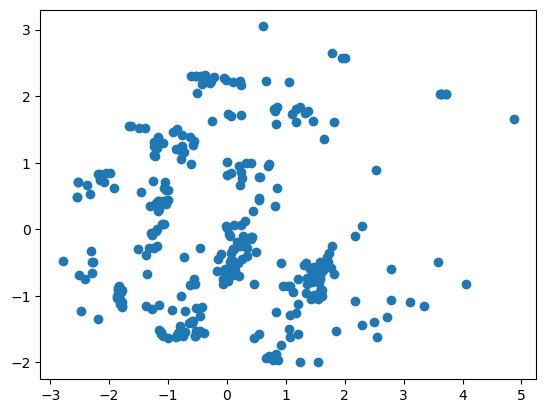

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=X_pca[:,0], y = X_pca[:,1])
plt.show()

In [29]:
X = data.drop(['price'], axis=1)
y = data.price

In [30]:
X

,rooms,area1,district,building_type,year,no_first_no_last,area3_bins
0,2.0,44.0,Автозаводский район,кирпич,1961.0,False,1.0
1,2.0,32.0,Советский район,кирпич,1958.0,False,1.0
2,2.0,45.0,Канавинский район,кирпич,1972.0,True,1.0
3,1.0,30.8,Канавинский район,кирпич,1965.0,True,0.0
4,2.0,48.0,Московский район,панель,2016.0,True,1.0
...,...,...,...,...,...,...,...
316,1.0,29.9,Автозаводский район,шлакоблок,1948.0,False,1.0
317,1.0,44.5,Нижегородский район,блок+утеплитель,2008.0,True,1.0
318,1.0,31.5,Ленинский район,кирпич,1962.0,True,0.0
319,1.0,30.9,Московский район,панель,1969.0,False,0.0


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, random_state=12)

In [38]:
type(X_test)

pandas.core.frame.DataFrame

In [98]:
obj_cols = list(X_train.columns[X_train.dtypes=='object'])
num_cols = list(X_train.columns[X_train.dtypes!='object'])
obj_cols,num_cols

(['district', 'building_type'],
 ['rooms', 'area1', 'year', 'no_first_no_last', 'area3_bins'])

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# from sklearn.linear_model import Ridge,Lasso
#from sklearn.preprocessing import PolynomialFeatures
# enc = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer(
    [
        ("categorial", OneHotEncoder(handle_unknown='ignore', drop='first'), obj_cols),
        ("numeric", StandardScaler(), num_cols)
    ],
    sparse_threshold=0
)


# pipe = Pipeline(
#     [
#         ('data_transformer', ct), 
#         ('feature_construction', PolynomialFeatures(degree=2, include_bias=False)),
#     ]
# )

In [100]:
X_train_transformed = ct.fit_transform(X_train)

In [101]:
X_train_transformed.shape

(224, 17)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)

pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

total_explained_variance = pca.explained_variance_ratio_.cumsum()

In [103]:
pca.explained_variance_ratio_

array([0.17171849, 0.12536304, 0.09430475, 0.0742479 , 0.07313145,
       0.06904009, 0.06585876, 0.06504917, 0.05754043, 0.05122359,
       0.04530927, 0.03398817, 0.02825481, 0.02017924, 0.01422231,
       0.00658328, 0.00398526])

In [104]:
total_explained_variance

array([0.17171849, 0.29708153, 0.39138627, 0.46563418, 0.53876562,
       0.60780571, 0.67366447, 0.73871363, 0.79625406, 0.84747765,
       0.89278692, 0.92677509, 0.95502991, 0.97520915, 0.98943146,
       0.99601474, 1.        ])

In [105]:
total_explained_variance[total_explained_variance >= .95]

array([0.95502991, 0.97520915, 0.98943146, 0.99601474, 1.        ])

In [106]:
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X_train_scaled.shape[1] - n_over_95 + 1

In [107]:
n_to_reach_95

13

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestRegressor


pipe = Pipeline(
    [
        ('data_transformer', ct), 
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_to_reach_95)),
        ('feature_selection', SelectFromModel(Lasso(alpha=100000)) ),
        ('ridge', Ridge(alpha=10.0)),
    ]
)

In [109]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('categorial',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['district',
                                                   'building_type']),
                                                 ('numeric', StandardScaler(),
                                                  ['rooms', 'area1', 'year',
                                                   'no_first_no_last',
                                                   'area3_bins'])])),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=13)),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=100000))),
                ('ridge', Ridge(alpha=10.0))])

In [110]:
pipe[-2].estimator_.coef_

array([ 442634.97905188,  539555.99978363, -317079.35960678,
       -609265.86022811,    7059.62998187,      -0.        ,
         -2029.04428955, -177051.16986679, -199371.27662157,
             0.        ,  153042.36918004,  388481.75104105,
            -0.        ])

In [111]:
pipe[-2].get_feature_names_out

<bound method SelectorMixin.get_feature_names_out of SelectFromModel(estimator=Lasso(alpha=100000))>

In [112]:
y_pred = pipe.predict(X_test)

<Axes: >

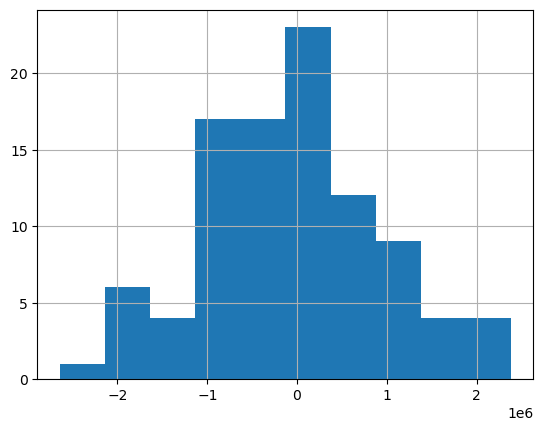

In [113]:
(y_test - y_pred).hist()

<Axes: xlabel='price', ylabel='price'>

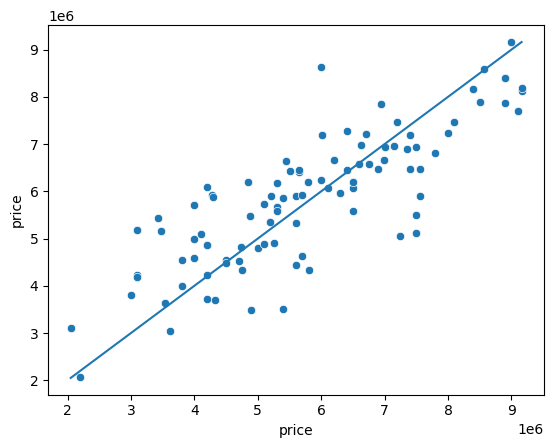

In [114]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test)

In [115]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,y_pred)

0.15093917955083763

Сохраним полученную модель:

In [116]:
import pickle

# save the model as a pickle file
model_pkl_file = "apartment_prices_regression_pca.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(pipe, file)

### Задания 
1. Сохранить полученную модель и использовать ее для реализации приложения streamlit. 
2. Попробовать другие способы борьбы с сдвигом (недообучением) модели.